<a href="https://colab.research.google.com/github/vangelis-michael/Deep-learning-/blob/master/HR_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploratory Data Analysis

Exploratory data analysis (EDA) analyze data sets to summarize their main characteristics with visual methods. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis allows data scientists to explore the data, and formulate hypotheses that could lead to new data collection and experiments. 

This is an extract of the curriculum that we teach in the Data Science 360 (https://www.thelead.io/data-science-360) certification. 





## Objectives:

#### 1. Exploring data and differentiating between employees who are leaving the company and those who have chosen to stay till now. 
This part mainly consists of visualization to get a feel of the distribution for different groups of employees.
    
#### 2. Find out the important factors which dictate the turnover of the employees.
This was done using univariate feature selection. Univariate feature selection works by selecting the best features based on univariate statistical tests.
    
#### 3. Fit prediction models and find out which employees might leave next.
The models used here are Logistic Regression and Support Vector Machine along with GridSearchCV.
    



## About the dataset
Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

## Getting started

Let's begin with the following code to set up the environment. We will be using `pandas`, `numpy`, and `seaborn` charting library.

**p/s:** If the Seaborn library is unavailable, you may install it using `pip` command at the command prompt.

```bash
> pip install seaborn
```

Copy and paste the following code into the following cell. 

```python
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'retina'
sns.set()
```



In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
sns.set()



If you are using Macbook with retina screen, the following command will render your chart in higher resolution.
> %config InlineBackend.figure_format = 'retina'

This command initialize the `Seaborn` chart library.
> sns.set()

This line make sure the chart is rendered inline.
> %matplotlib inline

## Load dataset 

```python
df = pd.read_csv('HR_dataset.csv')
df.info()
df.head()
```

The code above loads a csv file `hr_dataset.csv` into a dataframe (`df`). And the `info()` command shows the details of the database. The `head()` command allows us to show top records from the database.

### Question
- How do we load records from the bottom?

In [0]:
df = pd.read_csv('HR_dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
names                    15000 non-null object
satisfaction_level       15000 non-null float64
last_evaluation          15000 non-null float64
number_project           15000 non-null int64
average_monthly_hours    15000 non-null int64
exp_in_company           15000 non-null int64
work_accident            15000 non-null int64
left                     15000 non-null int64
promotion_last_5years    15000 non-null int64
role                     15000 non-null object
salary                   15000 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low


----

## Understand the correlation between variables

First we would like to obtain an overall understanding of the relationship between individual factors. A correlation matrix is a table showing correlation coefficients between sets of variables. This allows us to see which pairs have the highest correlation.

```python
sns.heatmap(df.corr(), cmap='Blues')
```

> The `cmap` parameter gives us the beautiful blue color cells.

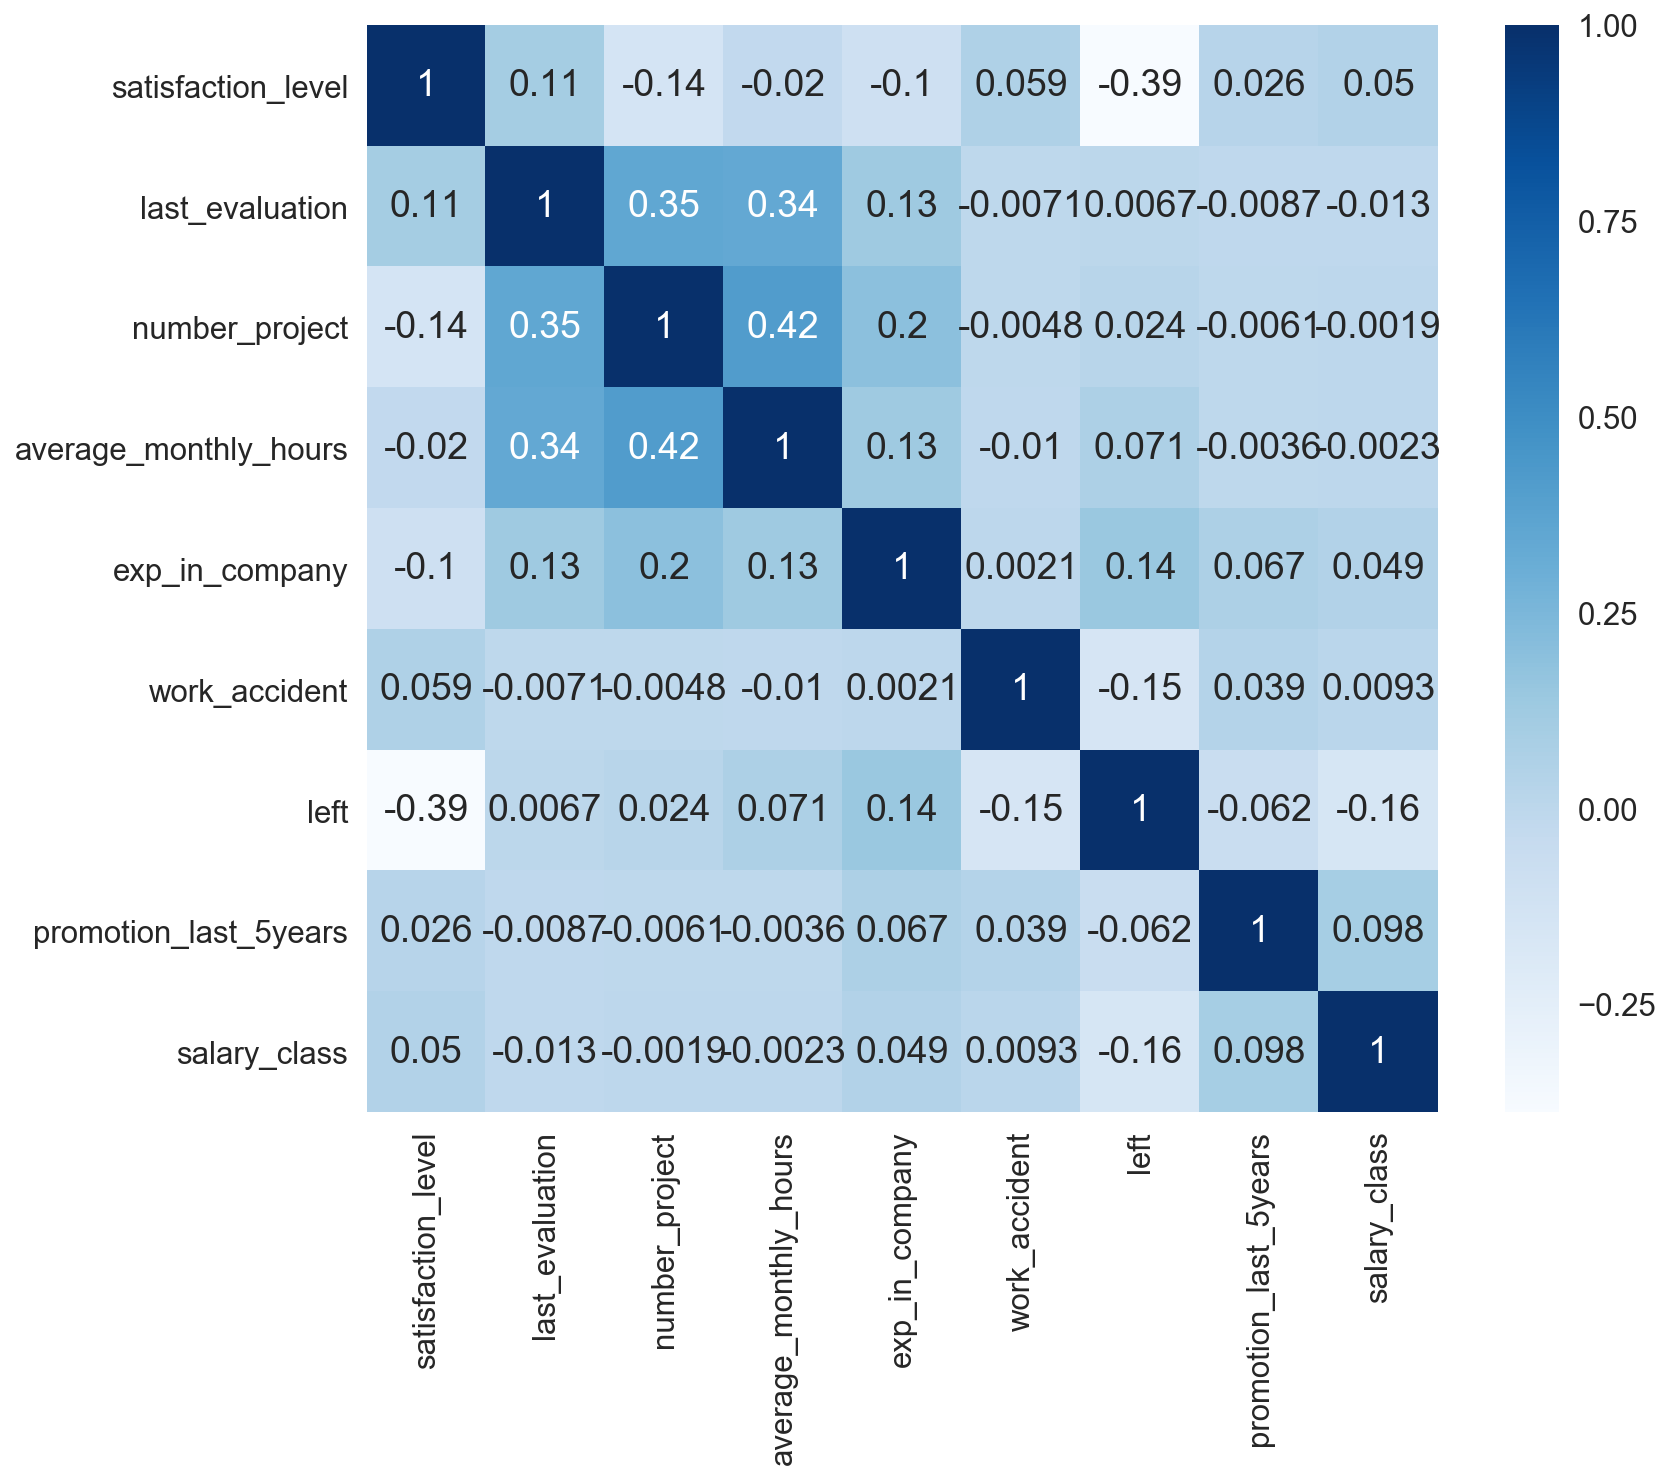

In [0]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=1.2)
    
sns.heatmap(df.corr(), cmap='Blues', annot=True);


From the heatmap, there is a positive(+) correlation between `projectCount`, `averageMonthlyHours`, and `evaluation`. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

----

## Explore Numerical Data

We can use `describe()` command to perform descriptive analytics on numerical data. This command summarizes the central tendency, dispersion and shape of a dataset’s distribution.

```python
df.describe()
```

For non-numerical field e.g. category field such as `role`, we can use the `unique()` command from `numpy` to help us to analyze and identify illegal values and outliers.

```python
np.unique(df['role'])
```

### Question
- How has the table helped you to answer some questions you identify earlier on ?

In [0]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [0]:
%%html
<style type="text/css">
.rendered_html pre, .rendered_html pre code  {
   background-color: #f6f6f6; 
};
</style>

Next we use the `countplot` command, to explore salary of each individual department's employee.

```python
sns.countplot(x='salary', hue='role', data=df, palette='Set2')
```

----

## Explore Categorical Data

For non-numerical data (e.g. categories), we can use a column chart to visualize. For instance, we can visualize the number of employees per department using the following code.

If the overlap of x axis label is disturbing you, you may use the following command to rotate 45&deg;

```python
loc, labels = plt.xticks()
chart.set_xticklabels(labels, rotation=45);
```

In [0]:
np.unique(df['role'])

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

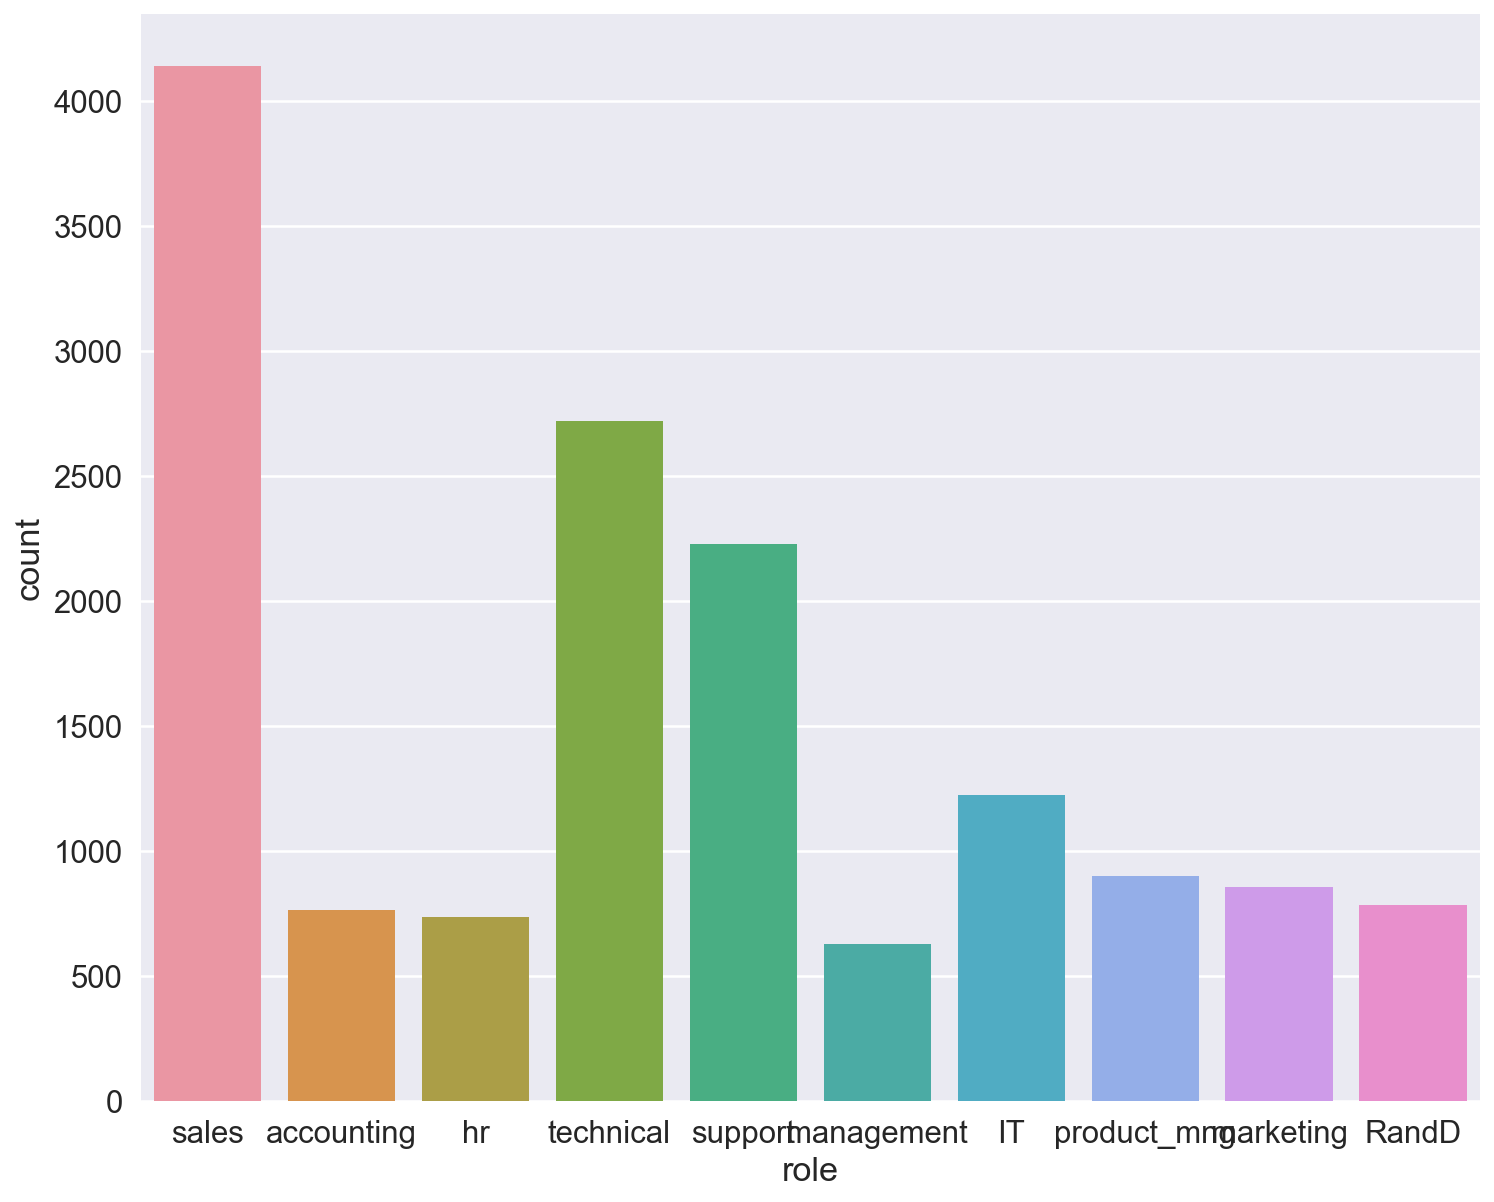

In [0]:
sns.countplot(df['role'])

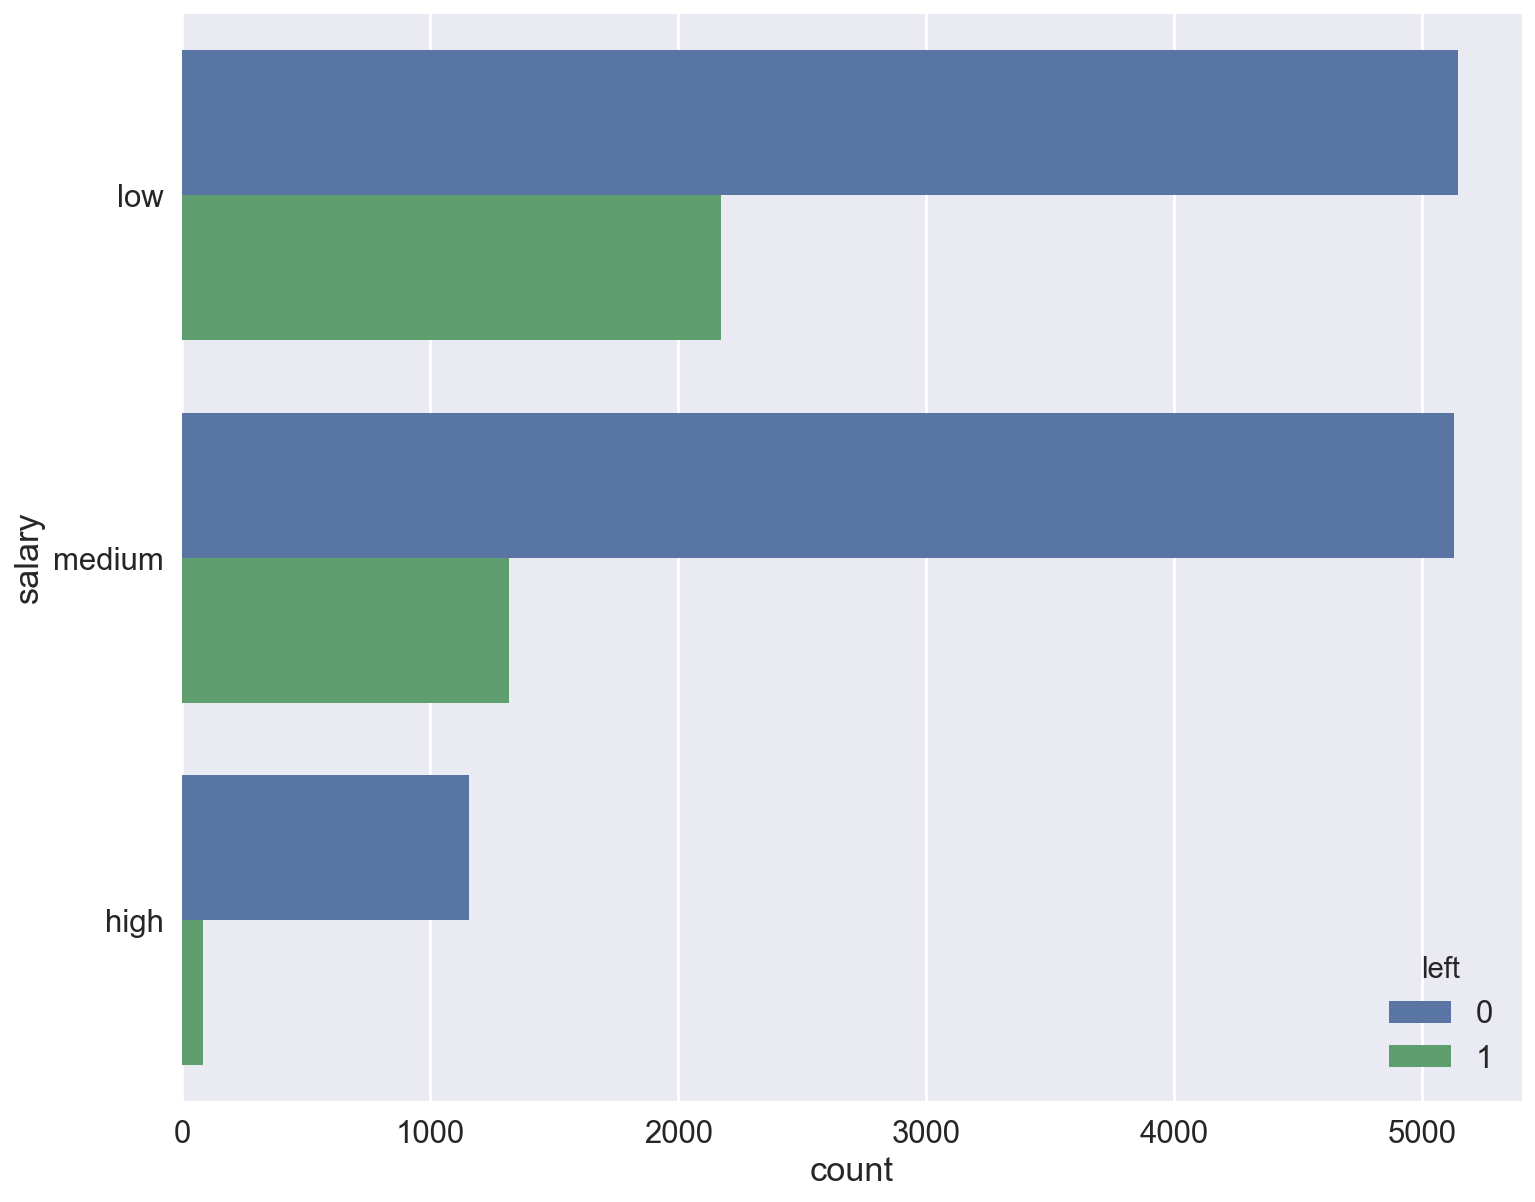

In [0]:
sns.countplot(y="salary", hue='left', data=df );

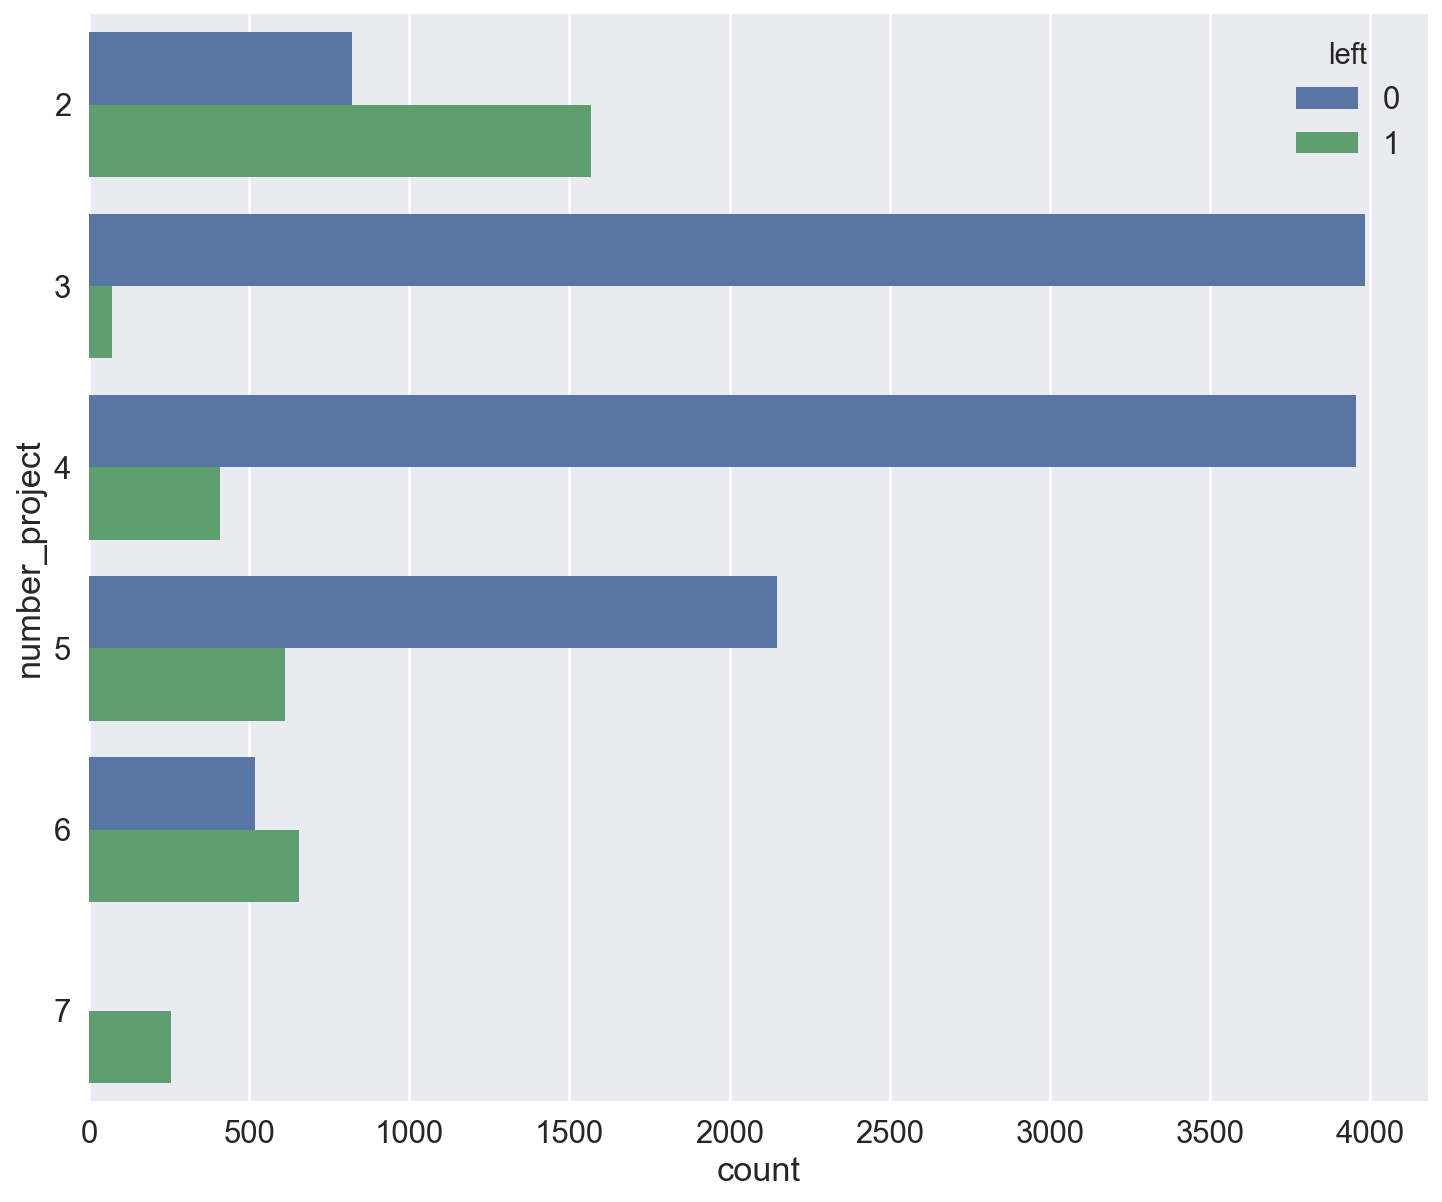

In [0]:
sns.countplot(y="number_project", hue='left', data=df );

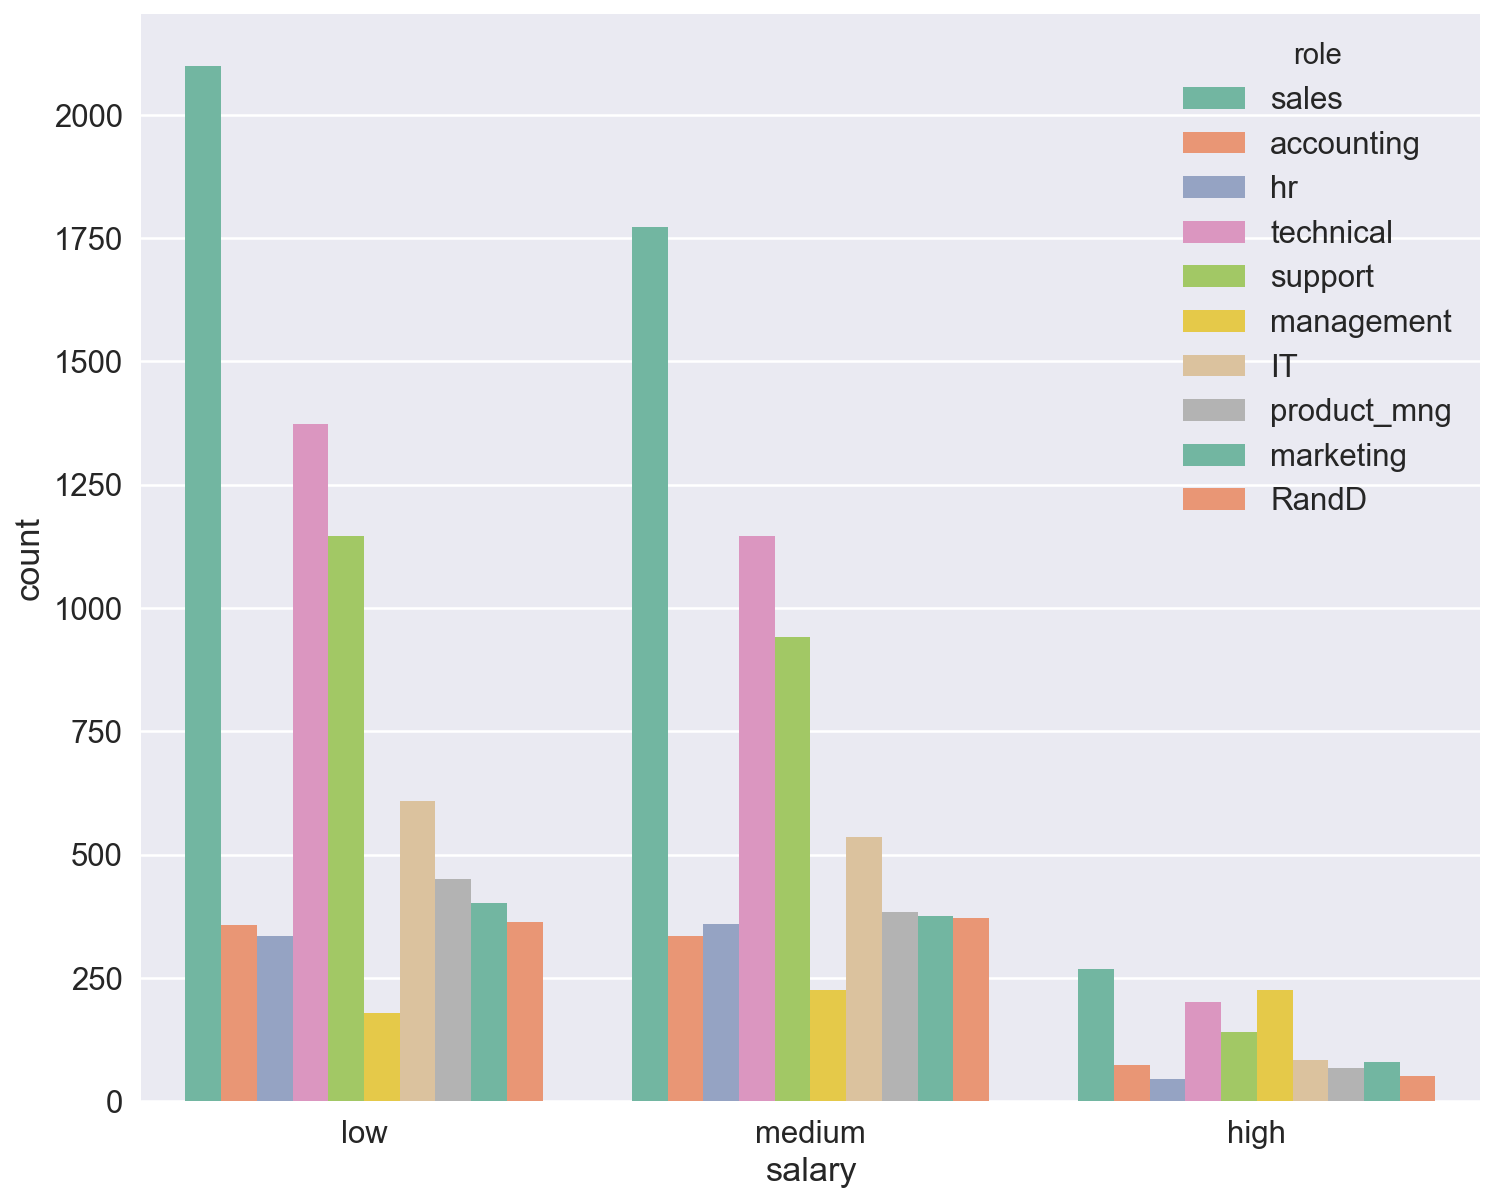

In [0]:
sns.countplot(x='salary', hue='role', data=df, palette='Set2');

----
## Convert categorical data to numeric

In the original dataset, the `salary` field contains only string value of `low`,`medium`,and`high`. In order to further process, we will have to convert this field into a numerical field.

First we reorder the categories into respective orders.

```python
df.salary = df.salary.astype('category').cat.reorder_categories(['low', 'medium', 'high'])
```

Then we convert salary into numeric and join with the original data frame.

```python
salary_numeric = pd.DataFrame(df.salary.cat.codes)
salary_numeric.columns = ['salary']
df = df.drop(['salary'], 1).join(salary_numeric)
```




Copy the lines above into the following cell.

---

## Visualize distribution using Histogram

We can use the following command to plot a histogram.

```python
sns.distplot(df['satisfaction_level'], norm_hist=False, kde=False);
```

**Task:** Try to plot the histogram of different variables and visualize the effect.


/Users/cherhan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


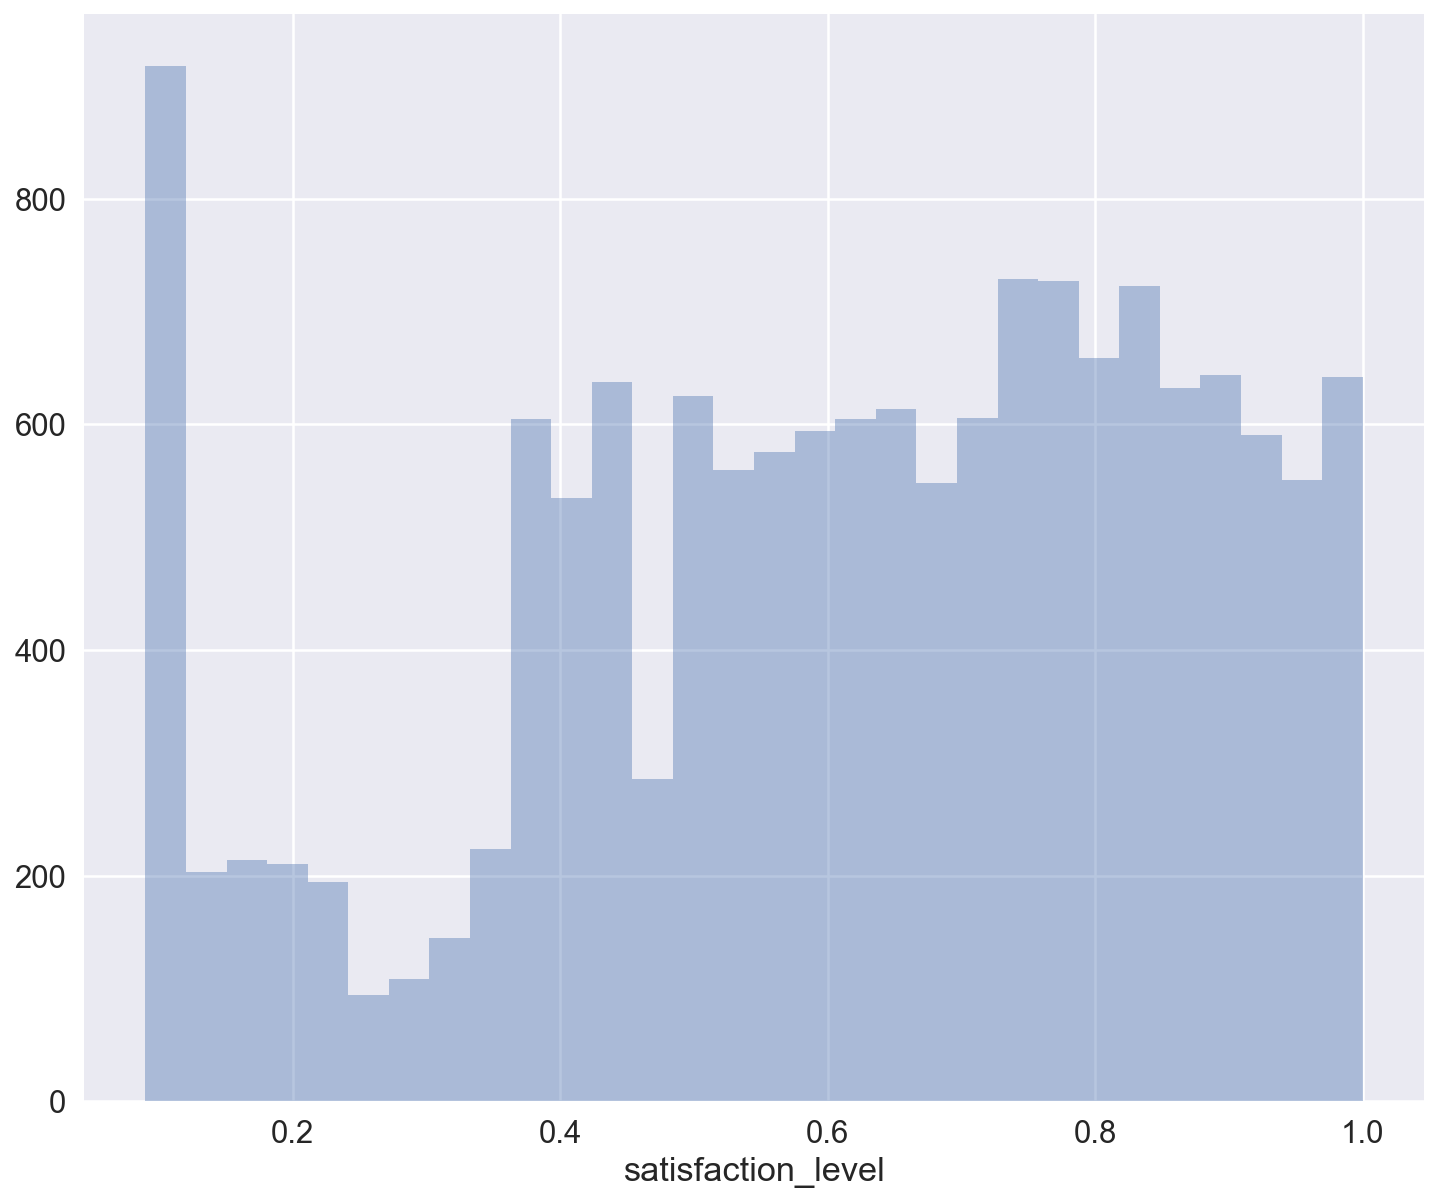

In [0]:
sns.distplot(df['satisfaction_level'], norm_hist=False, kde=False);

/Users/cherhan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


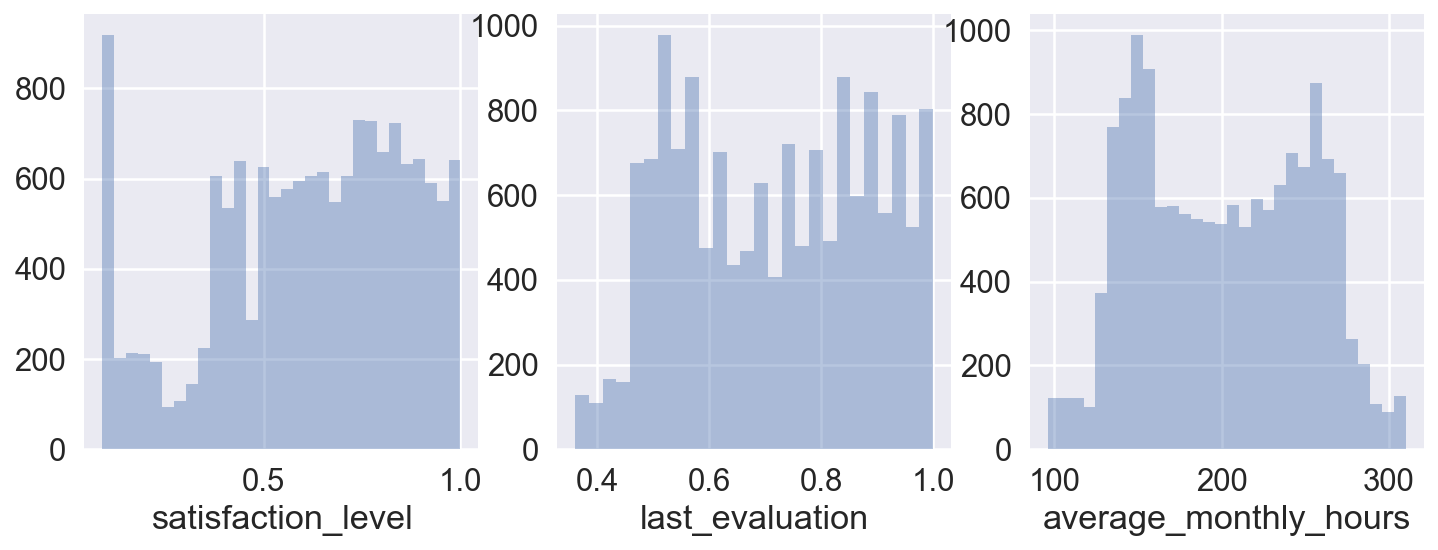

In [0]:
# Factor Plot
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

sns.distplot(df['satisfaction_level'], norm_hist=False, kde=False, ax=ax1);
sns.distplot(df['last_evaluation'], norm_hist=False, kde=False, ax=ax2);
sns.distplot(df['average_monthly_hours'], norm_hist=False, kde=False, ax=ax3);


# Final Words

This is a simplified version of HR analytics that help us to identify key features. 

This is what we found:
1. Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
2. Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
3. Employees with either really high or low evaluations should be taken into consideration for high turnover rate
4. Employees with low to medium salaries are the bulk of employee turnover
5. Employees that had 2,6, or 7 project count was at risk of leaving the company
6. Employee satisfaction is the highest indicator for employee turnover.
7. Employee that had 4 and 5 years at company should be taken into consideration for high turnover rate

From the insights that we gained here, we are able to propose to management a few things:
1. Reduce working hours and number of projects to prevent staff from overworked.
2. Increase involvement so that staff get more opportunities to work on projects